<h1>Beginner's Python for Engineers Project<h1>
Group 5: Student Info

Nguyen Xuan Binh - 887799

Responsibilities and tasks of each group member: Since I am the sole member of the project, I am responsible for the whole project

# Stage 0: Project Motivation and Loading the datasets
In this report, I will try to find if there exists any correlation between the recovered & death rate of Covid-19 cases of a country and the various metrics measuring the development of the country, such as GDP per capita and life expectancy in the World Happiness Index Report. In other words, the question is: should a country have lower Covid death and recovering rates if it is ranked higher in the World Happiness Report?  

First, I upload the datasets to the colaboratory: The Covid Dataset and the World Happiness Ranking Index Dataset, as well as import python various libraries. 

Base dataset: Covid cases records by country

Additional dataset: World happiness index by country



In [25]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.linear_model import LinearRegression
uploaded = files.upload()
dfCovid = pd.read_csv(io.BytesIO(uploaded['covid.csv']))
dfHappiness = pd.read_csv(io.BytesIO(uploaded['happiness.csv']))

Saving covid.csv to covid (1).csv
Saving happiness.csv to happiness (1).csv


# Stage 1: Cleaning the datasets 

*   First, I drop the unnecessary or irrelevant columns from both datasets
*   Secondly, I convert the data types of the columns of both datasets to their appropriate types using Pandas. Pandas has a convert_dtype() method, which can automatically recognise the type of the data contained in a column and cast it to the proper python datatype. 
*   Thirdly, I also rename the columns of both datasets so they have a more concise name. For example, Country/Region column is renamed into simply "country"
*   Cleaning null data errors: in the column deaths/100 recovered cases, there are some infinite values, suggesting that there have not been anyone recovering yet when the dataset is collected. Thus, I will remove the rows where it has inf values
*   Cleaning illogical data: also in the column deaths/100 recovered cases, there are some countries where values exceed 1000, which is illogical becaused the true death rate of Covid-19 is only around 5%. Thus, I will remove the rows where it has a substantially large value. 

In [9]:
cols = [1,2,3,4,5,6,7, 11, 12, 13, 14]
dfCovidClean = dfCovid.drop(dfCovid.columns[cols],axis=1).convert_dtypes()
dfCovidClean = dfCovidClean.rename(columns={"Country/Region": "country", "Deaths / 100 Cases": "deaths/100 cases", "Recovered / 100 Cases": "recovered/100 cases", "Deaths / 100 Recovered": "deaths/100 recovered", "1 week % increase": "weekly % increased cases"})
dfCovidClean = dfCovidClean.replace(np.inf, np.nan).dropna()
dfCovidClean = dfCovidClean.drop(dfCovidClean[dfCovidClean["deaths/100 recovered"] > 500].index)
cols = [2,6,7,8]
dfHappinessClean = dfHappiness.drop(dfHappiness.columns[cols],axis=1).convert_dtypes()
dfHappinessClean = dfHappinessClean.rename(columns={"Overall rank": "rank", "Score":"score", "Country or region": "country", "Social support": "social support", "Healthy life expectancy":"life expectancy"})
print("First 5 rows of Covid cases base dataset")
print(dfCovidClean.head(5))
print(f"\nNumber of rows of Covid cases base dataset: {dfCovidClean.shape[0]} rows")
print("\n\nFirst 5 rows of World Happiness Index additional dataset")
print(dfHappinessClean.head(5))
print(f"\nNumber of rows of World Happiness Index additional dataset: {dfHappinessClean.shape[0]} rows")

First 5 rows of Covid cases base dataset
       country  deaths/100 cases  recovered/100 cases  deaths/100 recovered
0  Afghanistan               3.5                69.49                  5.04
1      Albania              2.95                56.25                  5.25
2      Algeria              4.16                67.34                  6.17
3      Andorra              5.73                88.53                  6.48
4       Angola              4.32                25.47                 16.94

Number of rows of Covid cases base dataset: 180 rows


First 5 rows of World Happiness Index additional dataset
   rank      country  GDP per capita  social support  life expectancy
0     1      Finland            1.34           1.587            0.986
1     2      Denmark           1.383           1.573            0.996
2     3       Norway           1.488           1.582            1.028
3     4      Iceland            1.38           1.624            1.026
4     5  Netherlands           1.396    

# Stage 2: Information of the relevant columns of the datasets
The columns from the datasets used in analysis and their datatype are as follows:

Relevant columns of Covid cases Dataframe
*   country (string): recorded countries in the Covid cases base dataset
*   deaths/100 cases (float): average number of deaths per 100 recorded cases
*   recovered/100 cases (float): average number of recovered cases per 100 recorded cases
*   deaths/100 recovered (float): average number of deaths per 100 recovered cases


Relevant columns of World Happiness Index Dataframe
*   country (string): recorded countries in the World happiness index additional dataset
*   rank (int): ranking of the country in the report
*   GDP per capita (float): GDP per capita of the country score, not nommial values
*   social support (float): score of how easily a member of society can ask for help from society
*   life expectancy (float): the average life expectancy score of the country, not nominal values

### **Important: The datasets are based on the average metrics so that the comparison between the recorded countries will be fair** 

In [10]:
print("Data types of Covid Dataframe")
print(dfCovidClean.dtypes)
print("\nData types of World Happiness Index Dataframe")
print(dfHappinessClean.dtypes)

Data types of Covid Dataframe
country                  string
deaths/100 cases        Float64
recovered/100 cases     Float64
deaths/100 recovered    Float64
dtype: object

Data types of World Happiness Index Dataframe
rank                 Int64
country             string
GDP per capita     Float64
social support     Float64
life expectancy    Float64
dtype: object


# Stage 3: Merging the datasets together
The clean Covid cases base dataset contains 180 rows for 180 recorded countries, while the clean World Happiness Index addition dataset only contains 156 rows for 156 recorded countries. The datasets will be joined on the column "country" and the type of joining will be inner, choosing only the countries that are present in both datasets. 

The final merged dataframe is saved in finalDf variable. After combining the datasets, the finalDf is sorted by rankings of the country in World Happiness dataset. Final number of rows of the combined dataset is 138 rows

In [11]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
finalDf = pd.merge(dfCovidClean, dfHappinessClean, how='inner', on='country').sort_values(by=['rank'])
print("First 5 rows of the merged dataset")
print(finalDf.head())
print(f"\nNumber of rows of the final merged dataset: {finalDf.shape[0]} rows")

First 5 rows of the merged dataset
         country  deaths/100 cases  recovered/100 cases  deaths/100 recovered  \
41       Finland              4.45                93.54                  4.75   
34       Denmark              4.45                 91.6                  4.86   
97        Norway              2.79                95.84                  2.91   
54       Iceland              0.54                98.33                  0.55   
121  Switzerland              5.74                89.62                   6.4   

     rank  GDP per capita  social support  life expectancy  
41      1            1.34           1.587            0.986  
34      2           1.383           1.573            0.996  
97      3           1.488           1.582            1.028  
54      4            1.38           1.624            1.026  
121     6           1.452           1.526            1.052  

Number of rows of the final merged dataset: 138 rows


# Stage 4: Calculating basic data statistics
Now I use pandas described() method to calculate some of the basic statistical properties of the combined data, which are the mean, standard deviation, min and max values

The rank column will be left out since it has no statistical meaning for mean and standard deviation

In [12]:
print("\nPrinting summary statistics of the combined dataset:\n")
print(finalDf.drop(['rank'], axis = 1).describe().loc[['mean','std','min','max']])


Printing summary statistics of the combined dataset:

      deaths/100 cases  recovered/100 cases  deaths/100 recovered  \
mean          3.065725            66.929275              5.619565   
std           3.505090            22.276438              8.012032   
min           0.000000             5.480000              0.000000   
max          28.560000            98.330000             57.980000   

      GDP per capita  social support  life expectancy  
mean        0.884739        1.199080         0.722536  
std         0.398041        0.298156         0.232235  
min         0.000000        0.000000         0.105000  
max         1.684000        1.624000         1.141000  


Analysis of the basic statistics:
*   On average, all countries has around 3 deaths and around 67 recovered cases per 100 recorded Covid cases. 
*   For number of deaths per 100 number of recovered cases, it is around 5, which is logical because the number of recovered cases are smaller than total recorded cases

For the three attributes from the World Happiness Report, we can inspect the statistical value "mean", "min", and "max". 
*   For GDP per capita, the average score is mid-way between the min and the max value, which may hint that the number of high and low income countries are nearly equal. 
*   For social support score, the mean is much closer to the max value, which means that generally there are many countries whose citizens can easily seek for help from people around them. 
*   For life expectancy score, the mean is also closer to the max value, suggesting that there are more countries that tend to have long life expectancy.  

# Stage 5: Data Representations And Analysis

### First Data Representation: Histograms of the Covid-19 Cases base dataset 
The columns "deaths per 100 cases", "deaths per 100 recovered cases" and "recovered cases/100 cases" are visualized with histogram. 

The reason histogram is chosen to analyze the Covid-19 dataset is that histogram is the best graph for frequency. The frequencies of the ranges of Covid rates are of interest and therefore, we want to know how covid rates are distributed among countries. 

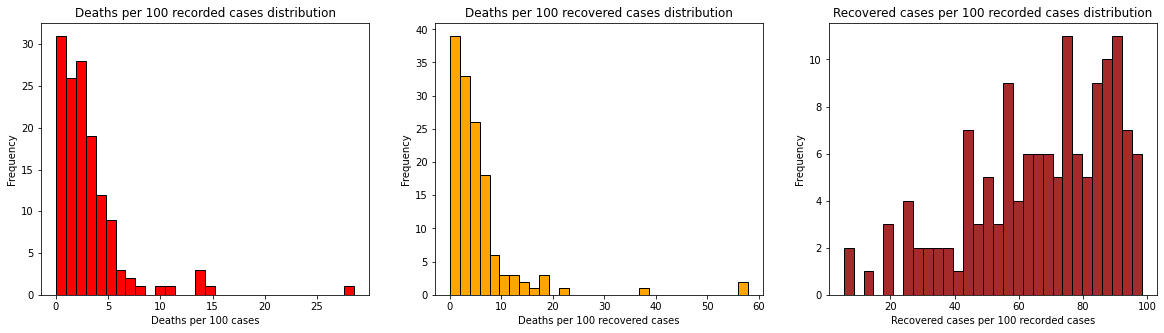

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].hist(finalDf["deaths/100 cases"], color="red", edgecolor='black', bins=30) 
axes[0].set_title("Deaths per 100 recorded cases distribution")
axes[0].set_xlabel('Deaths per 100 cases')
axes[0].set_ylabel('Frequency')
axes[1].hist(finalDf["deaths/100 recovered"], color="orange", edgecolor='black', bins=30)
axes[1].set_title("Deaths per 100 recovered cases distribution")
axes[1].set_xlabel('Deaths per 100 recovered cases')
axes[1].set_ylabel('Frequency')
axes[2].hist(finalDf["recovered/100 cases"], color="brown", edgecolor='black', bins=30)
axes[2].set_title("Recovered cases per 100 recorded cases distribution")
axes[2].set_xlabel('Recovered cases per 100 recorded cases')
axes[2].set_ylabel('Frequency')
plt.show()

1.   Analysis of the base dataset: 

- From the first data representation, the first two bar plots show that the death rates are concentrated around 0-5 deaths per 100 recorded cases and 0-10 deaths per 100 recovered cases, which truthfully reflects the true mortality rates of Covid-19 around 5%. 
- The third bar plot (recovered cases/ 100 cases) is simply the complement of the first bar plot (deaths/ 100 cases). Therefore, the recovering rates are more concentrated on the upper end, or around 90-95%.

### Second Data Representation: Line Graphs of the World Happiness additional dataset

The columns "GDP per capita", "Social support" and "Life expectancy" are visualized with line graphs.

The reason line graph is chosen to analyze the World Happiness dataset is that line graph is the best for observing changes over highest to lowest ranked countries. Naturally, the higher-ranked the country, the higher their attribute scores.

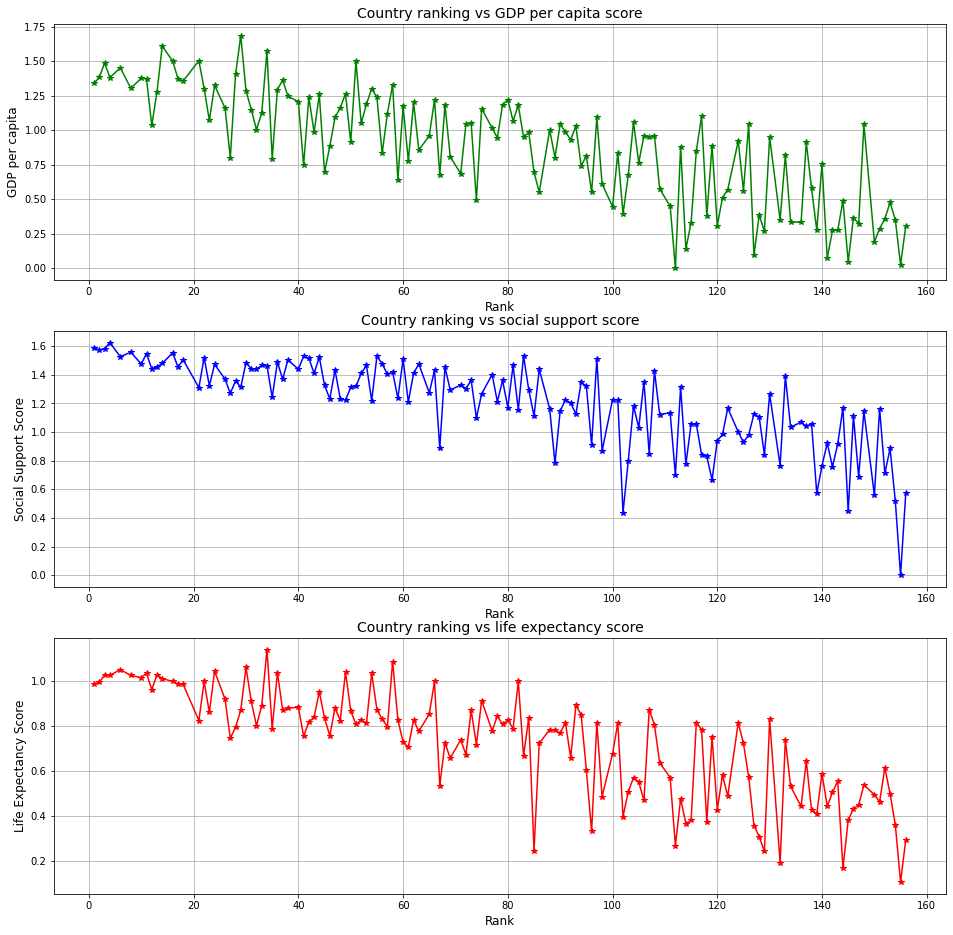

In [63]:
fig, axes = plt.subplots(3, 1, figsize=(16,16))
axes[0].plot(finalDf["rank"].to_numpy(), finalDf["GDP per capita"].to_numpy(), color='green', marker='*')
axes[0].set_title("Country ranking vs GDP per capita score",fontsize=14)
axes[0].set_xlabel('Rank', fontsize=12)
axes[0].set_ylabel('GDP per capita',fontsize=12)
axes[0].grid(True)

axes[1].plot(finalDf["rank"].to_numpy(), finalDf["social support"].to_numpy(), color='blue', marker='*')
axes[1].set_title("Country ranking vs social support score",fontsize=14)
axes[1].set_xlabel('Rank', fontsize=12)
axes[1].set_ylabel('Social Support Score',fontsize=12)
axes[1].grid(True)

axes[2].plot(finalDf["rank"].to_numpy(), finalDf["life expectancy"].to_numpy(), color='red', marker='*')
axes[2].set_title("Country ranking vs life expectancy score",fontsize=14)
axes[2].set_xlabel('Rank', fontsize=12)
axes[2].set_ylabel('Life Expectancy Score',fontsize=12)
axes[2].grid(True)

plt.show()


2.   Analysis of the additional dataset:

- From the second data representation, the line graph shows that the lower the rank of the country, the more likely the attribute scores of the countries to be lower
- This is logical because the rank is directly based on the scores of the attributes. We can observe there are downward trends in the three line graphs. 

### Third Data Representation: Line Graphs of Country Rank in the World Happiness Report and their Covid-19 Rates

The columns "deaths per 100 cases", "deaths per 100 recovered cases" and "recovered cases/100 cases" of the Covid-19 dataset are visualized against their respective world happiness rank. 

The reason line graph is chosen to analyze the relationship between the World Happiness ranking and the country's covid rates is that line graph is the best for observing how the covid rates changes over highest to lowest ranked countries.

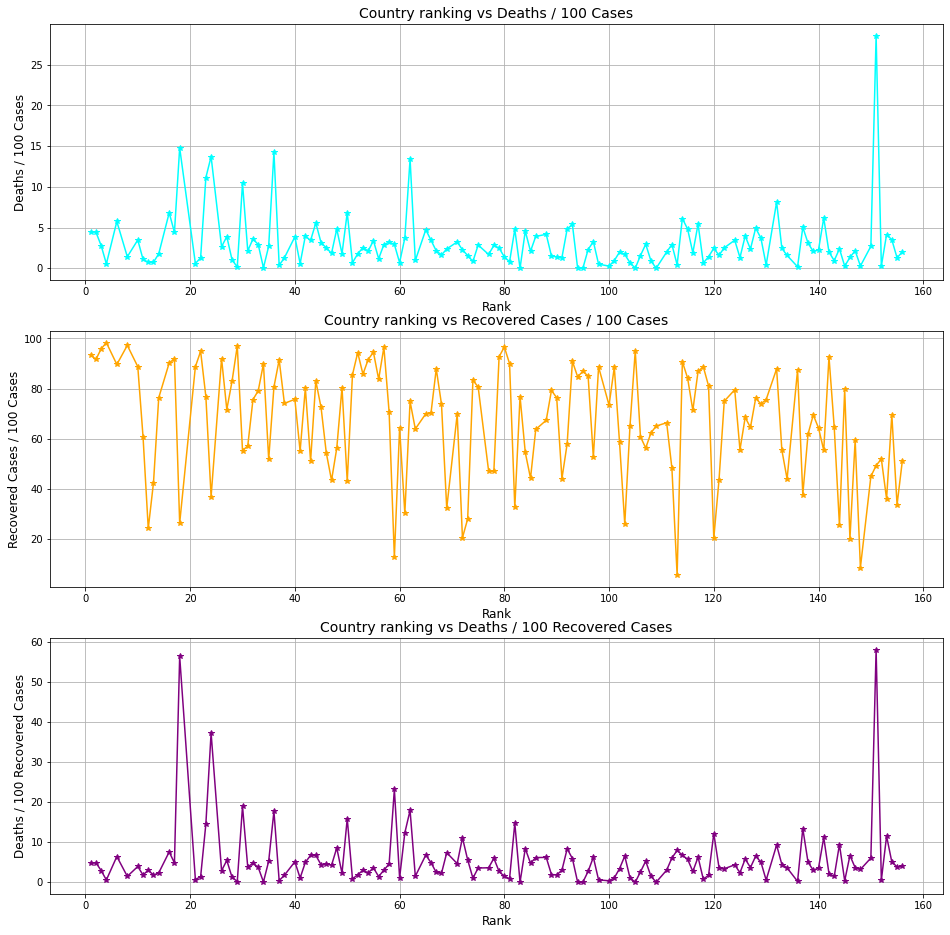

In [56]:
fig, axes = plt.subplots(3, 1, figsize=(16,16))
axes[0].plot(finalDf["rank"].to_numpy(), finalDf["deaths/100 cases"].to_numpy(), color='cyan', marker='*')
axes[0].set_title("Country ranking vs Deaths / 100 Cases", fontsize=14)
axes[0].set_xlabel('Rank', fontsize=12)
axes[0].set_ylabel('Deaths / 100 Cases', fontsize=12)
axes[0].grid(True)

axes[1].plot(finalDf["rank"].to_numpy(), finalDf["recovered/100 cases"].to_numpy(), color='orange', marker='*')
axes[1].set_title("Country ranking vs Recovered Cases / 100 Cases", fontsize=14)
axes[1].set_xlabel('Rank', fontsize=12)
axes[1].set_ylabel('Recovered Cases / 100 Cases', fontsize=12)
axes[1].grid(True)

axes[2].plot(finalDf["rank"].to_numpy(), finalDf["deaths/100 recovered"].to_numpy(), color='purple', marker='*')
axes[2].set_title("Country ranking vs Deaths / 100 Recovered Cases", fontsize=14)
axes[2].set_xlabel('Rank', fontsize=12)
axes[2].set_ylabel('Deaths / 100 Recovered Cases', fontsize=12)
axes[2].grid(True)

plt.show()

3.   Analysis of the relationship between the Covid rates and the World Happiness Rankings

- From the third data representation, we can see that the first and third line graphs resemble random white noise, which suggests that there is no causative relationship between the world happiness ranking and the death rates at all. 

- However, in the second line graph, there is a very subtle downward trend, which suggests that the the world happiness ranking slightly correlates with the number of recovered cases per 100 recorded cases. This relationship is shown clearer in the fourth data representation

### Fourth Data Representation: Scatter Plots of World Happiness attribute scores against Covid-19 Rates

The attribute columns of both datasets are plotted against each other pairwise, resulting in 3 x 3 = 9 scatter plots.

The reason scatter plot is chosen to analyze the relationship between the World Happiness attribute score and the country's covid rates is that scatter plot is the best graph for plotting the relationship between two datasets on a Cartesian plane when the datasets have equal size.

Besides the scatter plots, I also apply the linear regression line to fit the scatter plot data. 

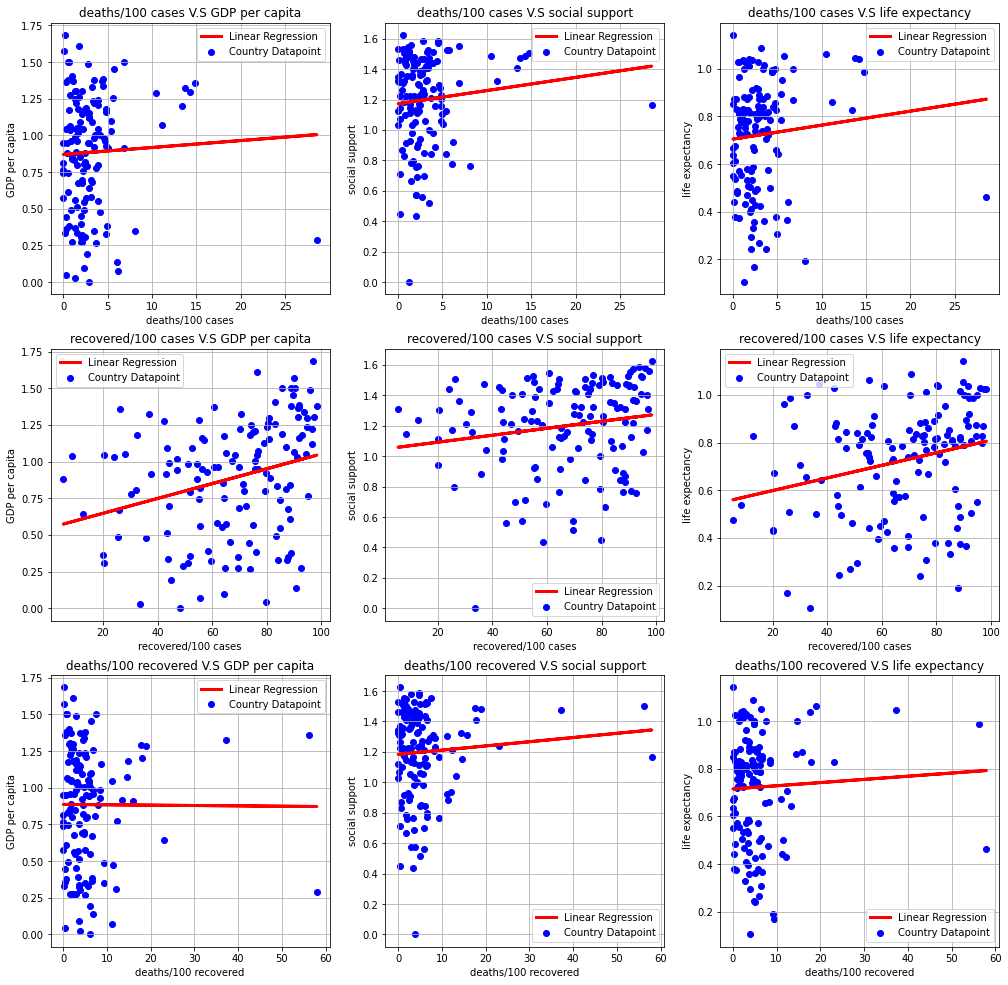

In [31]:
baseColumns = ["deaths/100 cases", "recovered/100 cases",  "deaths/100 recovered"]
additionalColumns = ["GDP per capita", "social support", "life expectancy"]

fig, axes = plt.subplots(3, 3, figsize=(17,17))
for i in range(3):
  for j in range(3):
    base = baseColumns[i]
    additional = additionalColumns[j]
    reg = LinearRegression().fit(finalDf[base].to_numpy().reshape(-1,1), finalDf[additional].to_numpy())
    y_pred = reg.predict(finalDf[base].to_numpy().reshape(-1,1))
    axes[i][j].set_title(f"{base} V.S {additional}")
    axes[i][j].set_xlabel(base)
    axes[i][j].set_ylabel(additional)
    axes[i][j].plot(finalDf[base].to_numpy(), y_pred, color="red", linewidth=3, label = "Linear Regression")
    axes[i][j].scatter(finalDf[base], finalDf[additional], color="blue", label = "Country Datapoint")
    axes[i][j].grid(True)
    axes[i][j].legend()

4.   Analysis of the relationship between the Covid rates and the World Happiness attribute scores
- From the fourth data representation, there are linear regression lines that are plotted against the scatter plots to show the relationship between the datasets. From the first row and third row where x-axis is deaths per 100 recorded cases and deaths per 100 recovered cases, the slope of the regression line is nearly 0 (trivial slope)

- By definition, zero slope is the slope of a horizontal line, which means the y-coordinate never changes no matter what the x-coordinate is. In other words, the world happiness attribute scores such as social support and life expectancy does not affect the death rates.  

- In the second row where x-axis is recovered cases per 100 recorded cases, the slopes of the regression lines are non-trivial (not very close to 0), suggesting that there is a positive relationship between the world happiness index and the rate of recovered cases. This is what illustrates the relationship found from the second line graph in the third data representation.

# Stage 6: Conclusions and sources of the project
# Conclusions
1. The possible reasons for the discovered relationships between the Covid-19 cases base dataset and the World happiness report additional dataset are:

- World happiness index ranking and attribute scores (GDP per capita, social support, life expectancy) have no effect on the death rates of the surveyed countries. This could be due to the uniform death rates of Covid-19. In other words, the death rates are similar across countries becauses there are no studies that found certain ethnicities to have better immunity against Covid than the others.
- On the other hand, world happiness index ranking and attribute scores (GDP per capita, social support, life expectancy) have an effect on the recovering rates of the surveyed countries. This could be stemmed from the fact that higher-ranking countries have better health care system, more prosperous to purchase enough vaccines and people can reach out for help more easily when they fall sick. Therefore, people are more likely to recovered from Covid-19 in higher-ranking countries. 

2.  Things I have learned so far in this course:
*   Preparing, cleaning and formating datasets so they can be useable for further analysis
*   Calculating statistics, applying regression models on the dataset for data analysis
*   Visualizing the data with Python libraries. Data visualization is crucial in delivering analysis results to interested readers

# Sources of the project
Sources of the datasets are    

* The base dataset:
> COVID-19 Dataset: Number of Confirmed, Death and Recovered cases every day across the globe. Available at https://www.kaggle.com/datasets/imdevskp/corona-virus-report

* The additional dataset 
> World Happiness Report: Happiness scored according to economic production, social support, etc. Available at https://www.kaggle.com/datasets/unsdsn/world-happiness


Source of the libraries 
* Numpy library
> https://numpy.org
* Pandas library
> https://pandas.pydata.org
* Matplotlib library
> https://matplotlib.org
